# Исследование рынка недвижимости г.Санкт-Петербург



**Описание проекта:**

На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость
объектов недвижимости разного типа, типичные параметры квартир, в зависимости от
удаленности от центра. Проведена предобработка данных. Добавлены новые данные.
Построены гистограммы, боксплоты, диаграммы рассеивания.

**Задачи проекта:**

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

**План работы:**
1. Загрузка файла с данными и изучение общей информации
2. Предобработка данных:
- обработка пропущенных и аномальных значений
- преобразование типов данных
- обработка редких и выбивающихся значений
3. Добавление в таблицу новых столбцов
4. Исследовательский анализ данных:
- изучение параметров объектов
- изучение скорости продажи квартир
- изучение зависимости цены от различных параметров
- расчет средней цены одного квадратного метра в 10 населенных пунктах
- изучение зависимости стоимости объектов от расстояния до центра города 
5. Выводы по проекту

## Загрузка файла с данными и изучение общей информации. 

In [1]:
import pandas as pd #импортируем библиотеку pandas
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib
# установим максимальное количество отображающихся столбцов
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #открываем файл real_estate_data
data_old = data.copy()#делаем копию исходного датафрейма

display(data.head(20)) #выводим на экран первые двадцать строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() #выводим на экран общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

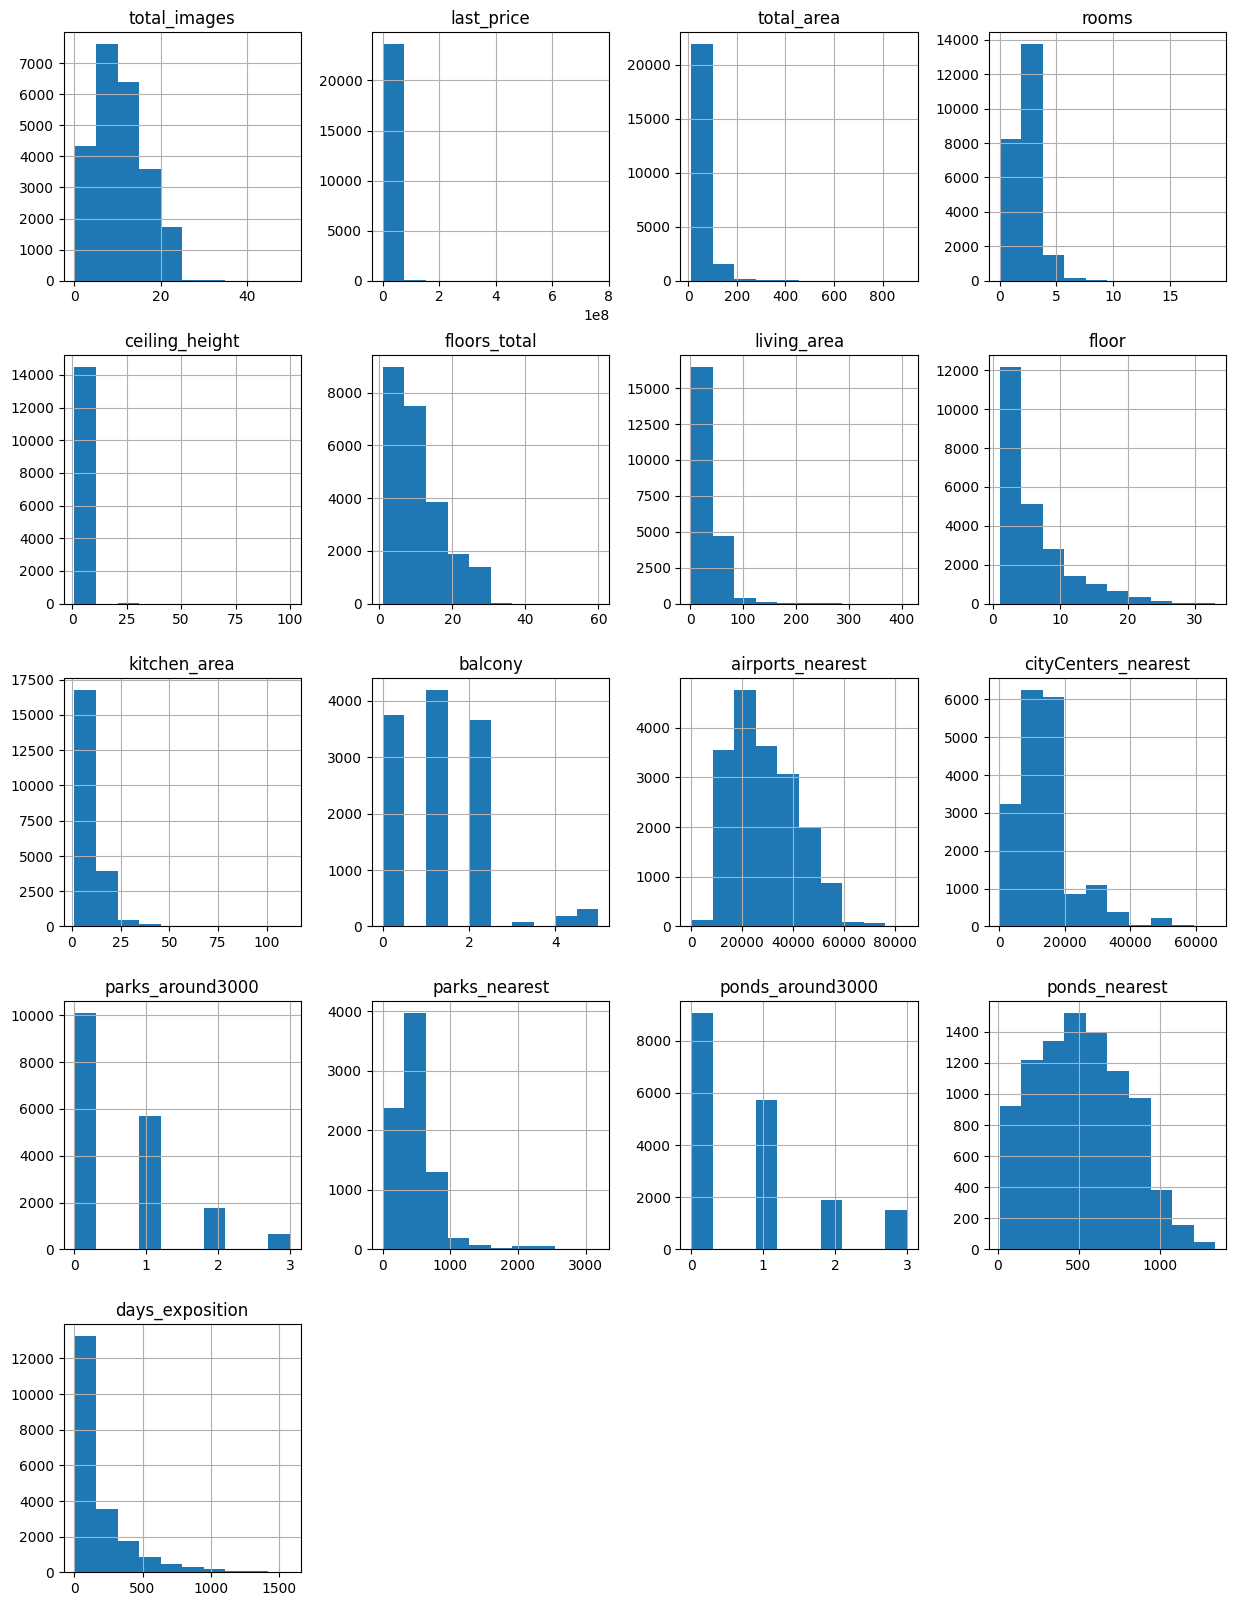

In [4]:
data.hist(figsize=(15, 20)); #строим гистограммы для всех столбцов датафрейма


**Выводы по пункту 1:**
    
  В процессе изучения общей информации о датафрейме были выявлены пропущенные значения в 14 столбцах. 
В 4 столбцах выявлен неверный тип данных.  
Также были обнаружены аномальные значения:
- высота потолков 25 м и более (вероятнее всего, значение введено или выгружено неверно 2,5 м и т.п.)
- площадь кухни нереально большая - 50 метров и более (вероятнее всего, значение введено или выгружено неверно: 5 м и т.п.)
- указана площадь кухни, при этом квартира является студией
- количество комнат в квартире равно 0. 

## Предобработка данных

### Обработка пропущенных  и аномальных значений

In [5]:
data.isna().sum() #находим количество пропущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
print('Пропуски до:', data['balcony'].isna().sum()) # выводим на экран количество пропусков столбца balcony до обработки пропусков

data['balcony'] = data['balcony'].fillna(0) # в столбце balcony заменяем все пропущенные значения на 0

print('Пропуски после:', data['balcony'].isna().sum()) # выводим на экран количество пропусков столбца balcony после обработки пропусков

Пропуски до: 11519
Пропуски после: 0


In [7]:
print('Пропуски до:', data['living_area'].isna().sum()) # выводим на экран количество пропусков столбца living_area до обработки пропусков

# перебирая в цикле уникальные значения столбца rooms, заменяем пропущенные значения в столбце living_area на медианнные
# в зависимости от количества комнат в квартире
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] =\
    data.loc[data['rooms'] == room, 'living_area'].median()
    
data.loc[data['rooms'] == 0, 'rooms'] = 1 # в столбце rooms: там, где количество комнат = 0, заменяем на 1

print('Пропуски после:', data['living_area'].isna().sum()) # выводим на экран количество пропусков столбца living_area после обработки пропусков


Пропуски до: 1903
Пропуски после: 0


In [8]:
print('Пропуски до:', data['kitchen_area'].isna().sum()) # выводим на экран количество пропусков столбца kitchen_area до обработки пропусков

# перебирая в цикле уникальные значения столбца rooms, заменяем пропущенные значения в столбце kitchen_area на медианнные
# в зависимости от количества комнат в квартире
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] =\
    data.loc[data['rooms'] == room, 'kitchen_area'].median()

print('Пропуски после:', data['kitchen_area'].isna().sum()) # выводим на экран количество пропусков столбца kitchen_area после обработки пропусков
   

Пропуски до: 2278
Пропуски после: 0


In [9]:
print('Пропуски до:', data['is_apartment'].isna().sum()) # выводим на экран количество пропусков столбца is_apartment до обработки пропусков

data.loc[data['is_apartment'].isna(), 'is_apartment'] = False #заменяем пропущенные значения в столбце is_apartment на False

print('Пропуски после:', data['is_apartment'].isna().sum()) # выводим на экран количество пропусков столбца is_apartment после обработки пропусков
   

Пропуски до: 20924
Пропуски после: 0


In [10]:
data['kitchen_area'].unique() #выводим на экран уникальные значения столбца kitchen_area

array([ 25.  ,  11.  ,   8.3 ,   9.5 ,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,   9.04,  13.4 ,  17.  ,   6.3 ,   8.8 ,  11.6 ,  10.  ,
        17.6 ,   7.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

In [11]:
#аномальные значения в столбце kitchen_area (высота больше 50 метров) перерасчитываем(делим на 10)
data.loc[data['kitchen_area'] > 50, 'kitchen_area'] =\
data.loc[data['kitchen_area'] > 50, 'kitchen_area'] / 10

#если квартира является студией, то значение в столбце kitchen_area заменяем на 0
data.loc[data['studio'] == True, 'kitchen_area'] =\
data.loc[data['studio'] == True, 'kitchen_area'] = 0

data['kitchen_area'].sort_values().unique() #проверка - выводим на экран уникальные значения столбца kitchen_area 

array([ 0.  ,  1.3 ,  2.  ,  2.3 ,  2.4 ,  2.89,  3.  ,  3.2 ,  3.3 ,
        3.4 ,  3.5 ,  3.7 ,  3.8 ,  4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,
        4.5 ,  4.6 ,  4.7 ,  4.8 ,  4.9 ,  5.  ,  5.02,  5.04,  5.06,
        5.1 ,  5.14,  5.18,  5.2 ,  5.21,  5.23,  5.25,  5.28,  5.29,
        5.3 ,  5.31,  5.31,  5.33,  5.35,  5.4 ,  5.42,  5.43,  5.44,
        5.47,  5.49,  5.5 ,  5.53,  5.55,  5.57,  5.59,  5.6 ,  5.61,
        5.62,  5.64,  5.65,  5.68,  5.7 ,  5.74,  5.75,  5.78,  5.8 ,
        5.82,  5.84,  5.85,  5.86,  5.9 ,  5.91,  6.  ,  6.02,  6.03,
        6.1 ,  6.16,  6.19,  6.2 ,  6.22,  6.23,  6.24,  6.25,  6.26,
        6.27,  6.28,  6.3 ,  6.31,  6.33,  6.34,  6.35,  6.36,  6.37,
        6.4 ,  6.47,  6.5 ,  6.55,  6.58,  6.6 ,  6.61,  6.62,  6.65,
        6.7 ,  6.72,  6.73,  6.76,  6.77,  6.8 ,  6.82,  6.83,  6.84,
        6.86,  6.9 ,  6.91,  6.93,  6.95,  7.  ,  7.02,  7.03,  7.06,
        7.09,  7.1 ,  7.12,  7.15,  7.17,  7.18,  7.19,  7.2 ,  7.3 ,
        7.36,  7.4 ,

In [12]:
data['ceiling_height'].unique() #выводим на экран уникальные значения столбца ceiling_height


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [13]:
#аномальные значения в столбце ceiling_height (высота больше 20 метров) перерасчитываем(делим на 10)
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] =\
data.loc[data['ceiling_height'] >=20, 'ceiling_height'] / 10
   
data['ceiling_height'].unique() #проверка - выводим на экран уникальные значения столбца ceiling_height


array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [14]:
print('Пропуски до:', data['floors_total'].isna().sum()) # выводим на экран количество пропусков столбца floors_total до обработки пропусков

#заменяем пропущенные значения в столбце floors_total на значение столбца floor 
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']

print('Пропуски после:', data['floors_total'].isna().sum()) # выводим на экран количество пропусков столбца floors_total после обработки пропусков    


Пропуски до: 86
Пропуски после: 0


In [15]:
print('Пропуски до:', data['ceiling_height'].isna().sum()) # выводим на экран количество пропусков столбца ceiling_height до обработки пропусков

#заменяем пропущенные значения в столбце ceiling_height на медианное значение 
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

print('Пропуски после:', data['ceiling_height'].isna().sum()) # выводим на экран количество пропусков столбца ceiling_height после обработки пропусков    

Пропуски до: 9195
Пропуски после: 0


In [16]:
data['locality_name'].sort_values().unique() #выводим на экран уникальные значения столбца locality_name

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [17]:
data.loc[data['locality_name'].isna()] #выводим на экран для анализа пропущенные значения в столбце locality_name

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,2.65,4.0,42.60,2,False,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.65,24.0,15.60,3,False,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.65,24.0,33.10,21,False,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.65,5.0,30.80,5,False,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,2.65,7.0,45.00,6,False,False,False,9.50,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.65,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.65,24.0,20.00,23,False,False,False,9.04,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [18]:
data = data.dropna(subset=['locality_name']) #удаляем пропущенные значения в столбце locality_name

In [19]:
#создаем функцию и внутри нее цикл, с помощью которой оставляем только слова, которые начинаются с большой буквы
def not_lower(line):
    for l in range(len(line)):
        if line[l].isupper() == True:
            return line[l:len(line)]
        
data['locality_name'] = data['locality_name'].apply(not_lower) #применяем вышеуказанную функцию к столбцу locality_name

data['locality_name'].sort_values().unique() #проверка - выводим на экран уникальные значения столбца locality_name(остались только слова, начинающиеся с большой буквы)

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [20]:
data.isna().sum() # проверка замены/удаления пропущенных значений - находим количество пропущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Выводы по пункту 2.1.**

В процессе изучения общей информации о датафрейме были выявлены пропущенные значения в 14 столбцах. К причинам, по которым возникли пропуски в данных, можно отнести:
- автоматизированная система сбора информации дала сбой или человеческий фактор при вводе данных вручную
- некорректная выгрузка данных в датасет
- отсутствует информация по какому-либо параметру (столбцы is_apartment, parks_nearest и т.п.)
- значения в строках с пропусками действительно равны 0 или не могут быть заполнены по объективным причинам (в столбце balcony, к примеру, если квартира не имеет балкона или в столбце days_exposition, если квартира еще не снята с продажи)

В результате предобработки пропущенные значения в 6 столбцах были замененны на соответствующие значения, либо на медианные. В столбце locality_name были удалены 49 строк с пропущенными наименованиями населенных пунктов, так как отсутствие наименований не позволит качественно провести исследовательский анализ в части определения средней цены одного квадратного метра по населенным пунктам, а также анализ квартир в Санкт-Петербурге. В столбце days_exposition пропуски были оставлены незаполненными, так как вероятнее всего, пропуски связаны с тем, что объявление еще не закрыто, т.е. квартира не снята с продажи и количество дней размещения объявления не известно на момент выгрузки данных. Также были оставлены незаполненными 6 столбцов с картографическими данными, так как не обнаружено логичной замены пропусков.

Также были обнаружены аномальные значения:
- высота потолков 25 м и более (вероятнее всего, значение введено или выгружено неверно 2,5 м и т.п.)
- площадь кухни нереально большая - 50 метров и более (вероятнее всего, значение введено или выгружено неверно: 5 м и т.п.)
- указана площадь кухни, при этом квартира является студией
- количество комнат в квартире равно 0.

Все обнаруженные аномальные значения также были устранены в результате предобработки данных.

### Преобразование типов данных

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']) #преобразуем тип данных в столбце first_day_exposition на datetime 

data = data.astype({'balcony' : 'int', 'is_apartment' : 'bool', 'floors_total' : 'int'}) #преобразуем типы данных в столбцах на int и bool

In [22]:
data.info() #проверка преобразования типов столбцов - выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

**Выводы по пункту 2.2.**

В результате предобработки данных был изменен тип данных в 4 столбцах.
В столбцах balcony и floors_total тип данных был изменен на целочисленный, для наглядности отображения в таблице.
В столбце first_day_exposition тип данных был изменен на datetime, так как этот тип данных дает возможность работать с датами(в частности, выделить отдельно год или месяц объявления)
В столбце is_apartment тип данных был изменен на булев тип данных, так как в этом столбце указаны данные в виде True и False, т.е. булевы значения, а булев тип данных дает возможность работать с истинностью утверждений. 

### Обработка редких и выбивающихся значений

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

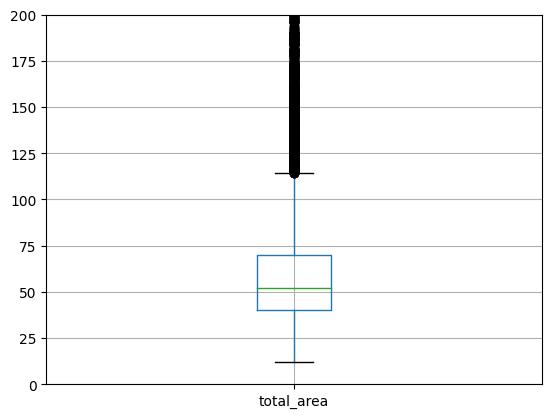

In [23]:
data.boxplot(column='total_area') #по столбцу total_area формируем диаграмму размаха
plt.ylim(0, 200)
plt.show
data['total_area'].describe() #получили числовое описание данных по столбцу total_area 

In [24]:
u = data['total_area'].quantile(0.99)#делаем расчет quantile по столбцу total_area
display(u)#выводим на экран результат расчета
data = data.loc[data['total_area'] < u] #удаляем выбросы по столбцу total_area из датафрейма

197.55699999999888

In [25]:
data['total_area'].sort_values().unique() #проверка удаления выбросов - выводим на экран уникальные значения столбца total_area, отсортированные по возрастанию

array([ 12. ,  13. ,  13.2, ..., 196. , 197. , 197.2])

count    23413.000000
mean         2.694175
std          0.244094
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

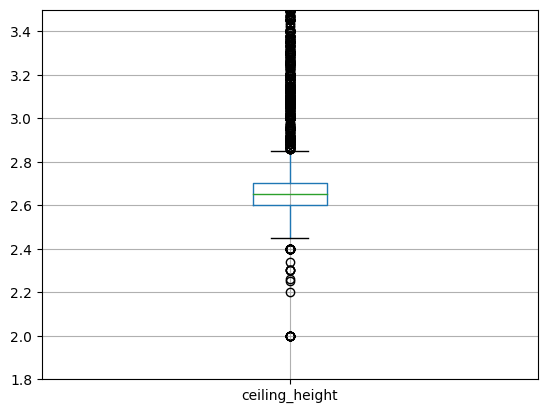

In [26]:
data.boxplot(column='ceiling_height') #по столбцу ceiling_height формируем диаграмму размаха
plt.ylim(1.8, 3.5)
plt.show
data['ceiling_height'].describe() #получили числовое описание данных по столбцу ceiling_height 

In [27]:
u = data['ceiling_height'].quantile(0.99)#делаем расчет quantile по столбцу ceiling_height
display(u)#выводим на экран результат расчета
data = data.loc[data['ceiling_height'] < u] #удаляем выбросы по столбцу ceiling_height из датафрейма

3.5

In [28]:
data['ceiling_height'].sort_values().unique() #проверка удаления выбросов - выводим на экран уникальные значения столбца ceiling_height, отсортированные по возрастанию

array([1.  , 1.2 , 1.75, 2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45,
       2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56,
       2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67,
       2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78,
       2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89,
       2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  ,
       3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11,
       3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23,
       3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34,
       3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46,
       3.47, 3.48, 3.49])

count    23063.000000
mean         2.027924
std          0.969798
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

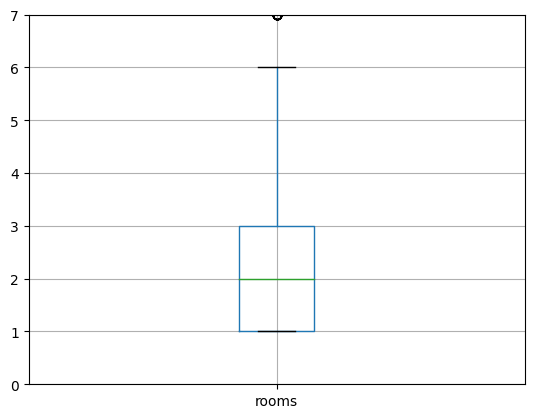

In [29]:
data.boxplot(column='rooms') #по столбцу rooms формируем диаграмму размаха
plt.ylim(0, 7)
plt.show
data['rooms'].describe() #получили числовое описание данных по столбцу rooms 

In [30]:
u = data['rooms'].quantile(0.99)#делаем расчет quantile по столбцу rooms
display(u)#выводим на экран результат расчета
data = data.loc[data['rooms'] < u] #удаляем выбросы по столбцу rooms из датафрейма

5.0

In [31]:
data['rooms'].sort_values().unique() #проверка удаления выбросов - выводим на экран уникальные значения столбца rooms, отсортированные по возрастанию

array([1, 2, 3, 4], dtype=int64)

count    22760.000000
mean         5.768432
std          5.439583
min          0.012190
25%          3.400000
50%          4.550000
75%          6.500000
max        289.238400
Name: last_price, dtype: float64

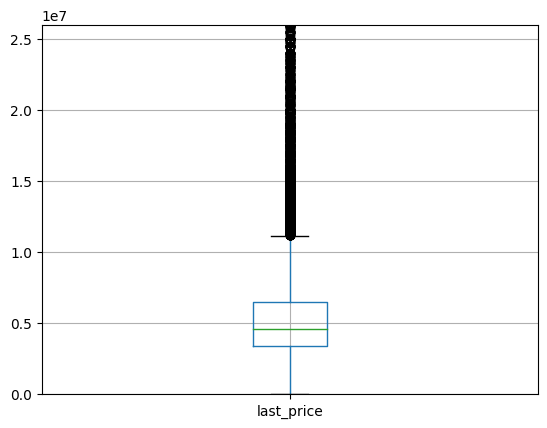

In [32]:
data.boxplot(column='last_price') #по столбцу last_price формируем диаграмму размаха
plt.ylim(0, 26000000)
plt.show
(data['last_price'] / 1000000).describe() #получили числовое описание данных по столбцу last_price 

In [33]:
u = data['last_price'].quantile(0.99)#делаем расчет quantile по столбцу last_price
display(u)#выводим на экран результат расчета
data = data.loc[data['last_price'] < u] #удаляем выбросы по столбцу last_price из датафрейма

25500000.0

In [34]:
data['last_price'].sort_values().unique() #проверка удаления выбросов - выводим на экран уникальные значения столбца last_price, отсортированные по возрастанию

array([1.21900e+04, 4.30000e+05, 4.40000e+05, ..., 2.53980e+07,
       2.54768e+07, 2.54900e+07])

In [35]:
data_old.info() #выводим общую информацию об исходном датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [36]:
data.info()#проверка удаления строк - выводим общую информацию о датафрейме после удаления выбросов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22529 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22529 non-null  int64         
 1   last_price            22529 non-null  float64       
 2   total_area            22529 non-null  float64       
 3   first_day_exposition  22529 non-null  datetime64[ns]
 4   rooms                 22529 non-null  int64         
 5   ceiling_height        22529 non-null  float64       
 6   floors_total          22529 non-null  int32         
 7   living_area           22529 non-null  float64       
 8   floor                 22529 non-null  int64         
 9   is_apartment          22529 non-null  bool          
 10  studio                22529 non-null  bool          
 11  open_plan             22529 non-null  bool          
 12  kitchen_area          22529 non-null  float64       
 13  balcony         

In [37]:
data.shape[0] / data_old.shape[0]

0.9506308283049918

**Выводы по пункту 2.3.**

В результате анализа датасета на редкие и выбивающиеся значения в ряде столбцов с помощью диаграммы размаха и данных описательной статистики были обнаружены строки, в которых значения можно отнести к выбросам. Эти строки были удалены из датасета. Процент строк с выбросами по отношению к общему изначальному числу строк датасета составил около 5%.

## Добавление в таблицу новых столбцов

In [38]:
#добавляем в датафрейм новый столбец price_one_squere_meter с расчетом цены одного квадратного метра
data['price_one_squere_meter'] = data['last_price'] / data['total_area'] 


In [39]:
#добавляем в датафрейм новый столбец weekday_exposition с параметром: день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday


In [40]:
#добавляем в датафрейм новый столбец weekday_exposition с параметром: месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month


In [41]:
#добавляем в датафрейм новый столбец weekday_exposition с параметром: год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year


In [42]:
#создаем функцию, которая с помощью условных операторов if-else позволяет определить тип этажа квартиры
def type_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        if floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        'нет категории'
        
data['floor_type'] = data.apply(type_floor, axis=1) #применяем созданную выше функцию к добавленному вновь столбцу floor_type
        

In [43]:
#добавляем в датафрейм новый столбец cityCenters_km, в котором рассчитывается расстояние до центра города в километрах
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
#округляем значения в столбце cityCenters_km до целых значений
data['cityCenters_km'] = data['cityCenters_km'].round(0)


In [44]:
data.head(20) #проверка добавления столбцов - выводим на экран первые двадцать строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_squere_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,14.0


## Исследовательский анализ данных

### Изучение параметров объектов
- общая площадь

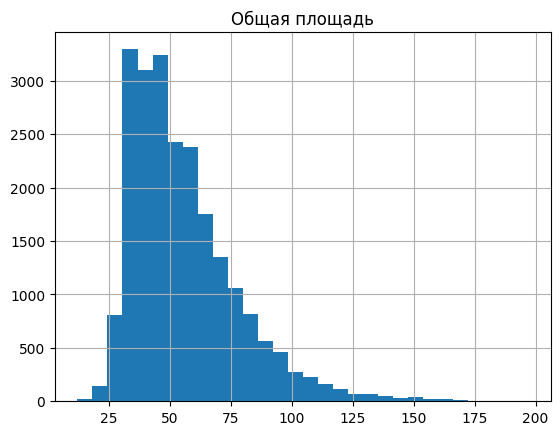

count    22529.000000
mean        55.656725
std         22.360963
min         12.000000
25%         39.550000
50%         50.500000
75%         66.200000
max        197.000000
Name: total_area, dtype: float64

In [45]:
data['total_area'].hist(bins=30); #строим гистограмму по столбцу total_area
plt.title('Общая площадь')
plt.show()
data['total_area'].describe() #получили числовое описание данных по столбцу total_area 

**Выводы:**

По параметру "общая площадь квартир": среднее: 55.7, медиана - 50.5, наиболее часто встречающееся значение - 35, минимальное значение - 12 кв.м., максимальное значение - 197 кв.м.

- жилая площадь

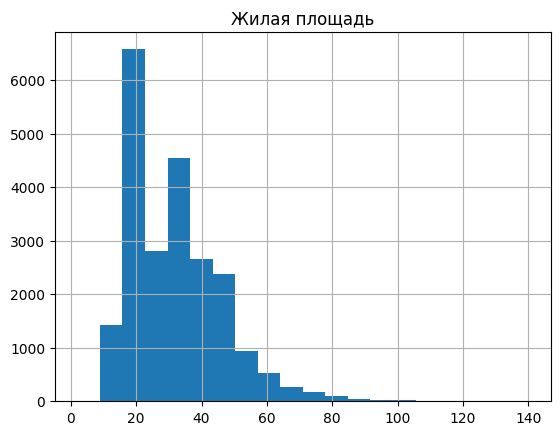

count    22529.000000
mean        31.574629
std         14.488318
min          2.000000
25%         18.000000
50%         30.000000
75%         41.000000
max        140.000000
Name: living_area, dtype: float64

In [46]:
data['living_area'].hist(bins=20); #строим гистограмму по столбцу living_area
plt.title('Жилая площадь')
plt.show()
data['living_area'].describe() #получили числовое описание данных по столбцу living_area 

**Выводы:**
По параметру "жилая площадь квартир": среднее: 31.6, медиана - 30.0, наиболее часто встречающееся значение - 18, минимальное значение - 2 кв.м., максимальное значение - 140 кв.м.

- площадь кухни

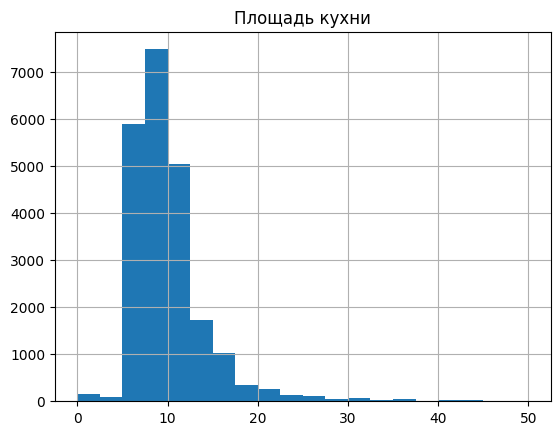

count    22529.000000
mean         9.920692
std          4.525738
min          0.000000
25%          7.100000
50%          9.000000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

In [47]:
data['kitchen_area'].hist(bins=20);  #строим гистограмму по столбцу kitchen_area
plt.title('Площадь кухни')
plt.show()
data['kitchen_area'].describe() #получили числовое описание данных по столбцу kitchen_area 

**Выводы:**

По параметру "площадь кухни": среднее: 9.9, медиана - 9, наиболее часто встречающееся значение - 8, минимальное значение - 0 кв.м. (квартира-студия), максимальное значение - 50 кв.м.

- цена объекта

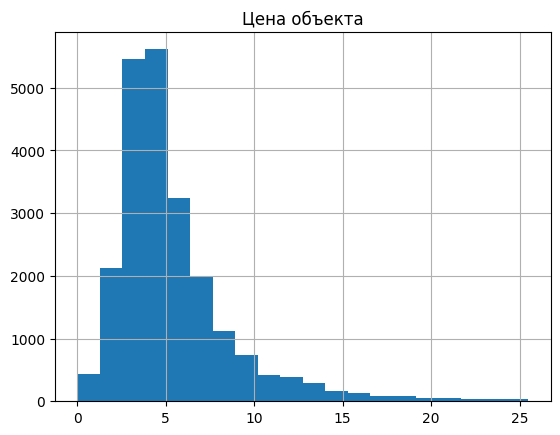

count    22529.000000
mean         5.410833
std          3.409303
min          0.012190
25%          3.390000
50%          4.500000
75%          6.400000
max         25.490000
Name: last_price, dtype: float64

In [48]:
(data['last_price'] / 1000000).hist(bins=20); #строим гистограмму по столбцу last_price
plt.title('Цена объекта')
plt.show()
(data['last_price'] / 1000000).describe() #получили числовое описание данных по столбцу last_price

**Выводы:**

По параметру "цена объекта": среднее: 5.41 млн.руб., медиана - 4.5 млн. руб.,наиболее часто встречающееся значение - 4 млн.руб., минимальное значение - 12.19 тыс руб., максимальное значение - 25.49 млн. руб.

- количество комнат

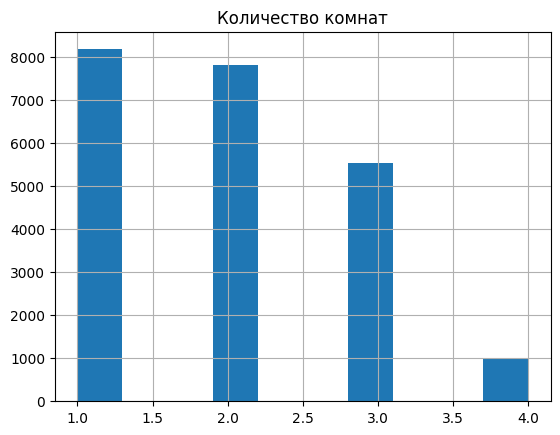

count    22529.000000
mean         1.971770
std          0.886542
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

In [49]:
data['rooms'].hist(bins=10); #строим гистограмму по столбцу rooms
plt.title('Количество комнат')
plt.show()
data['rooms'].describe() #получили числовое описание данных по столбцу rooms 

**Выводы:**

По параметру "количество комнат": среднее: 1.97, медиана - 2 ,наиболее часто встречающееся значение - 1, минимальное значение - 1, максимальное значение - 4.

- высота потолков

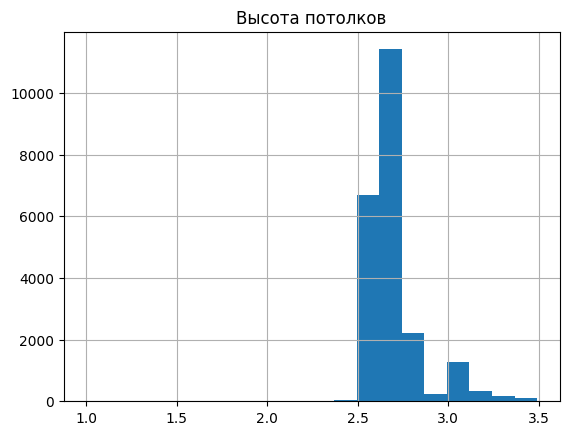

count    22529.000000
mean         2.671583
std          0.158314
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

In [50]:
data['ceiling_height'].hist(bins=20); #строим гистограмму по столбцу ceiling_height
plt.title('Высота потолков')
plt.show()
data['ceiling_height'].describe() #получили числовое описание данных по столбцу ceiling_height 

**Выводы:**

По параметру "высота потолков": среднее: 2.67, медиана - 2.65, наиболее часто встречающееся значение - 2,65, минимальное значение - 1 м., максимальное значение - 3.49 м.

- этаж квартиры

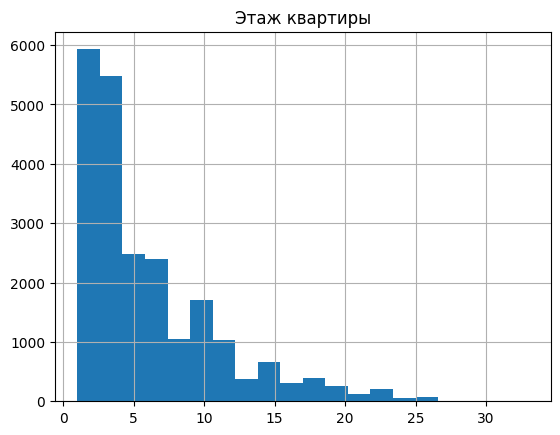

count    22529.000000
mean         5.965289
std          4.929730
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [51]:
data['floor'].hist(bins=20); #строим гистограмму по столбцу floor
plt.title('Этаж квартиры')
plt.show()
data['floor'].describe() #получили числовое описание данных по столбцу floor 

**Выводы:**

По параметру "этаж": среднее: 5.97, медиана - 4, наиболее часто встречающееся значение - 2, минимальное значение - 1 этаж, максимальное значение - 33 этаж.

- тип этажа квартиры

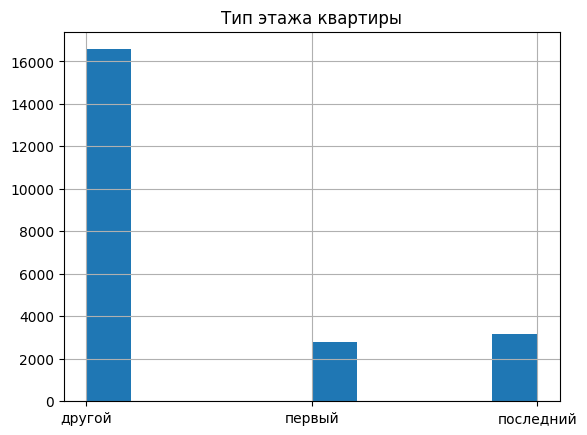

count      22529
unique         3
top       другой
freq       16569
Name: floor_type, dtype: object

In [52]:
data['floor_type'].hist(bins=10); #строим гистограмму по столбцу floor_type
plt.title('Тип этажа квартиры')
plt.show()
data['floor_type'].describe() #получили числовое описание данных по столбцу floor_type 

**Выводы:**
По параметру "тип этажа квартиры": чаще всего встречается тип этажа: другой.

- общее количество этажей в доме

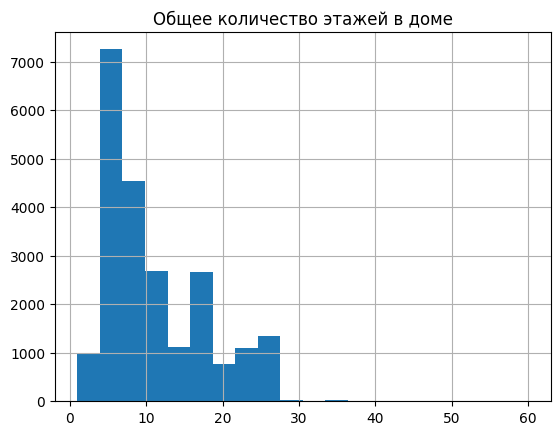

count    22529.000000
mean        10.859914
std          6.636574
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [53]:
data['floors_total'].hist(bins=20); #строим гистограмму по столбцу floors_total
plt.title('Общее количество этажей в доме')
plt.show()
data['floors_total'].describe() #получили числовое описание данных по столбцу floors_total 

**Выводы:**

По параметру "общее количество этажей в доме": среднее: 10.86, медиана - 9, наиболее часто встречающееся значение - 5, минимальное значение - 1 этаж, максимальное значение - 60 этаж.

- расстояние до центра города в метрах

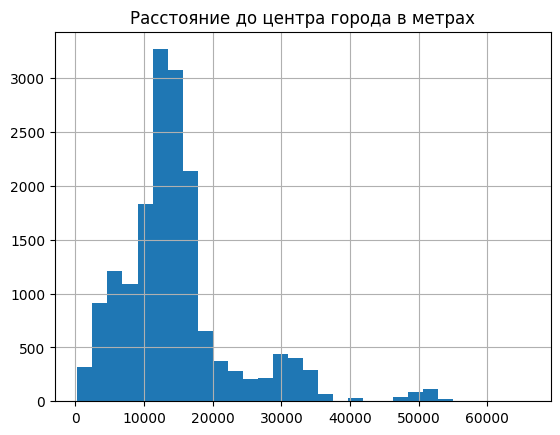

count    17076.000000
mean     14659.899742
std       8472.780185
min        287.000000
25%      10163.000000
50%      13355.000000
75%      16518.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [54]:
data['cityCenters_nearest'].hist(bins=30); #строим гистограмму по столбцу cityCenters_nearest
plt.title('Расстояние до центра города в метрах')
plt.show()
data['cityCenters_nearest'].describe() #получили числовое описание данных по столбцу cityCenters_nearest 

**Выводы:**

По параметру "расстояние до центра города в метрах": среднее - 14 659, медиана - 13355,наиболее часто встречающееся значение - примерно 12000 м., минимальное значение - 287 м., максимальное значение -  65968 м.

- расстояние до ближайшего аэропорта

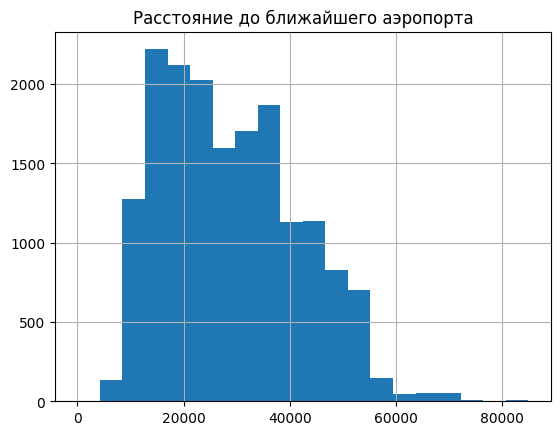

count    17058.000000
mean     28979.497186
std      12871.325639
min          0.000000
25%      18305.750000
50%      27299.500000
75%      37625.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [55]:
data['airports_nearest'].hist(bins=20); #строим гистограмму по столбцу airports_nearest
plt.title('Расстояние до ближайшего аэропорта')
plt.show()
data['airports_nearest'].describe() #получили числовое описание данных по столбцу airports_nearest 

**Выводы:**
По параметру "расстояние до ближайшего аэропорта": среднее - 28 979, медиана - 27 299, наиболее часто встречающееся значение - примерно 17000 м, минимальное значение -  0 м., максимальное значение -  84869 м.

- расстояние до ближайшего парка

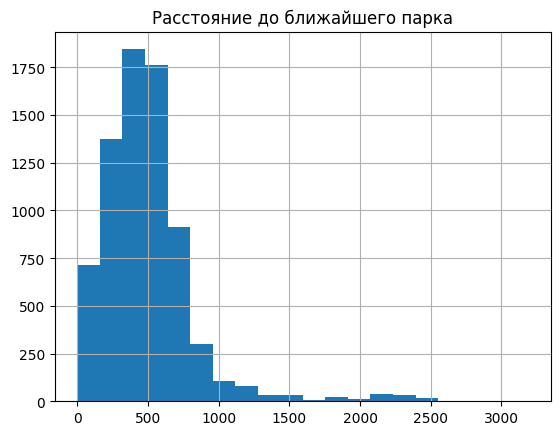

count    7307.000000
mean      497.910086
std       346.660185
min         1.000000
25%       293.000000
50%       458.000000
75%       618.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [56]:
data['parks_nearest'].hist(bins=20);#строим гистограмму по столбцу parks_nearest
plt.title('Расстояние до ближайшего парка')
plt.show()
data['parks_nearest'].describe() #получили числовое описание данных по столбцу parks_nearest 

**Выводы:**
По параметру "расстояние до ближайшего парка": среднее - 497, медиана - 458, наиболее часто встречающееся значение - 400 метров, минимальное значение -  1 м., максимальное значение - 3190 м.

- день публикации объявления

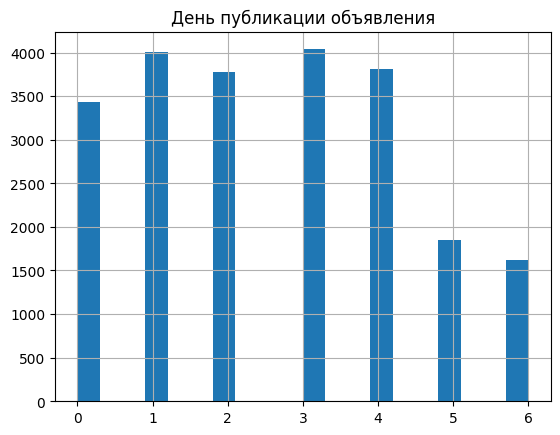

count    22529.000000
mean         2.569666
std          1.791747
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

In [57]:
data['weekday_exposition'].hist(bins=20); #строим гистограмму по столбцу weekday_exposition
plt.title('День публикации объявления')
plt.show()
data['weekday_exposition'].describe() #получили числовое описание данных по столбцу weekday_exposition 

**Выводы:**
По параметру "день публикации объявления": среднее - 2.57, медиана - 3, наиболее часто встречающееся значение - четверг.

- месяц публикации объявления

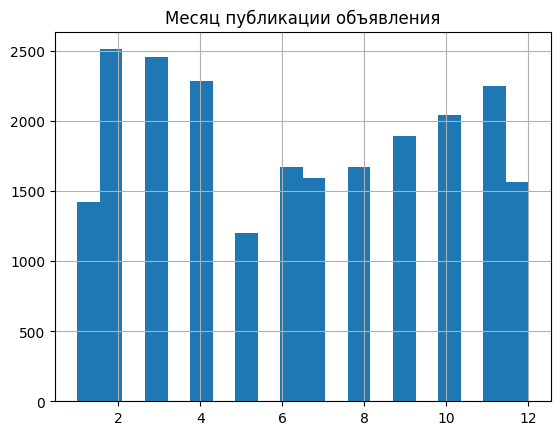

count    22529.000000
mean         6.403391
std          3.491149
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

In [58]:
data['month_exposition'].hist(bins=20); #строим гистограмму по столбцу month_exposition
plt.title('Месяц публикации объявления')
plt.show()
data['month_exposition'].describe() #получили числовое описание данных по столбцу month_exposition 

**Выводы:**

По параметру "месяц публикации объявления": среднее - 6.40, медиана - 6, наиболее часто встречающееся значение - февраль.

### Изучение скорости продажи квартир

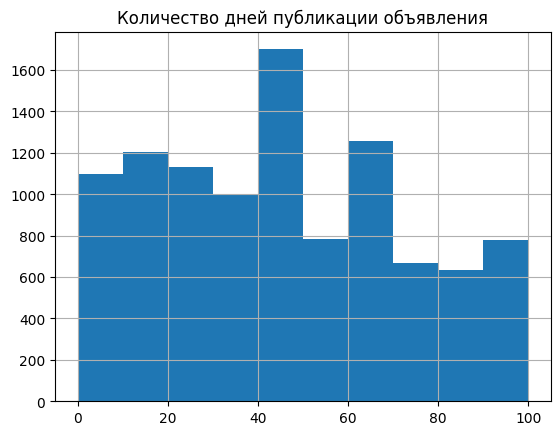

count    19632.000000
mean       176.649093
std        215.471374
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [59]:
data['days_exposition'].hist(bins=10, range=(0, 100)); #строим гистограмму по столбцу days_exposition
plt.title('Количество дней публикации объявления')
plt.show()
data['days_exposition'].describe() #получили числовое описание данных по столбцу days_exposition 


In [60]:
print('Среднее арифметическое времени размещения объявлений', data['days_exposition'].mean()) #выводим на экран рассчитанное среднее арифметическое времени размещения объявлений
print('Медиана времени размещения объявлений', data['days_exposition'].median()) # выводим на экран медиану времени размещения объявлений

Среднее арифметическое времени размещения объявлений 176.64909331703342
Медиана времени размещения объявлений 93.0


**Выводы по пункту 4.2.:**

По расчету среднего продажа занимает примерно 176 дней, но этот метод расчета очень сильно зависит от разброса сумм. Судя по значению среднего, некоторые значения сильно отличаются от большинства в большую сторону, поэтому идет перекос в сторону большей суммы, что некорректно характеризует данные. Медиана более корректно отражает среднее вне зависимости от разброса сумм.
Поэтому исходя из медианы продажа квартиры в среднем занимает 93 дня.
Соответственно, если объявления размещены до продажи 40 дней и менее (минимальное время размещения объявления - 1 день), такие продажи можно считать быстрыми. К необычно долгим продажам можно отнести продажи квартир, по которым объявления размещены год и более (максимальное время размещения объявления -  1580 дней).

### Изучение зависимости цены от различных параметров

In [61]:
#создаем функцию, с помощью которой строим и выводим на экран сводную таблицу зависимости цены квартиры от различных параметров
def addiction_price(column):
    data_pivot = data.pivot_table(index=column, values='last_price', aggfunc=['median'])
    data_pivot.columns = ['Медианное значение стоимости квартиры']
    display(data_pivot)

**- зависимость цены от общей площади**

Коэффициент корреляции: 0.7718422005675919


,Медианное значение стоимости квартиры
total_area,
12.0,2400000.0
13.0,1850000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
...,...
190.0,15475000.0
192.1,18000000.0
193.2,22990000.0


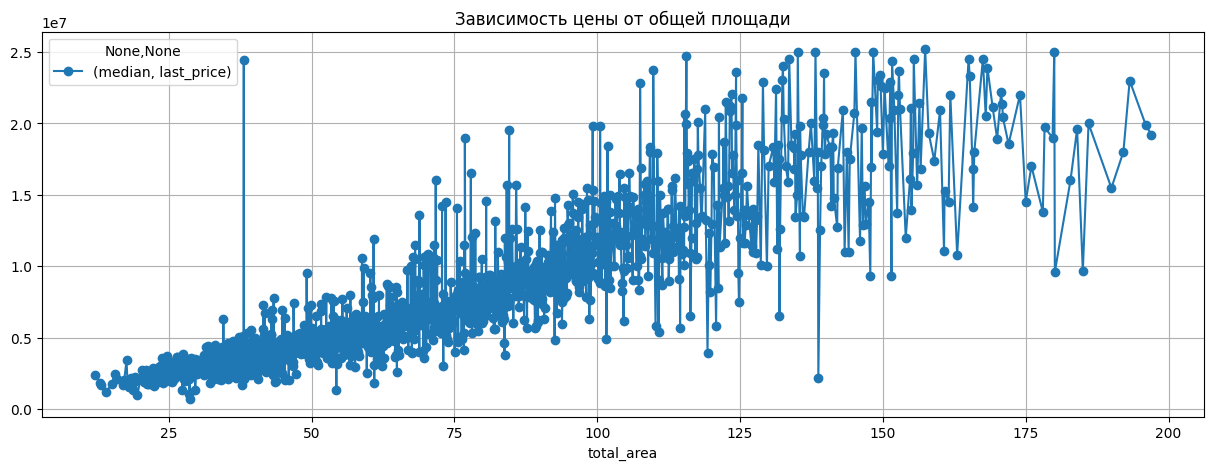

In [62]:
print('Коэффициент корреляции:', data['total_area'].corr(data['last_price']))#рассчитываем коэффициент корреляции для столбца total_area

addiction_price('total_area')#вызываем функцию addiction_price с параметром total_area

#строим график на основе сводной таблицы зависимости цены квартиры от total_area
(data
.pivot_table(index='total_area', values='last_price', aggfunc=['median'])
.plot(grid=True, figsize=(15, 5), style='o-')
)
plt.title('Зависимость цены от общей площади')
plt.show;

**- зависимость цены от жилой площади**

Коэффициент корреляции: 0.614617888903531


,Медианное значение стоимости квартиры
living_area,
2.0,4340000.0
3.0,4440000.0
5.0,2680000.0
5.4,6100000.0
6.0,3799000.0
...,...
118.5,15499000.0
124.0,13900000.0
125.0,13700000.0


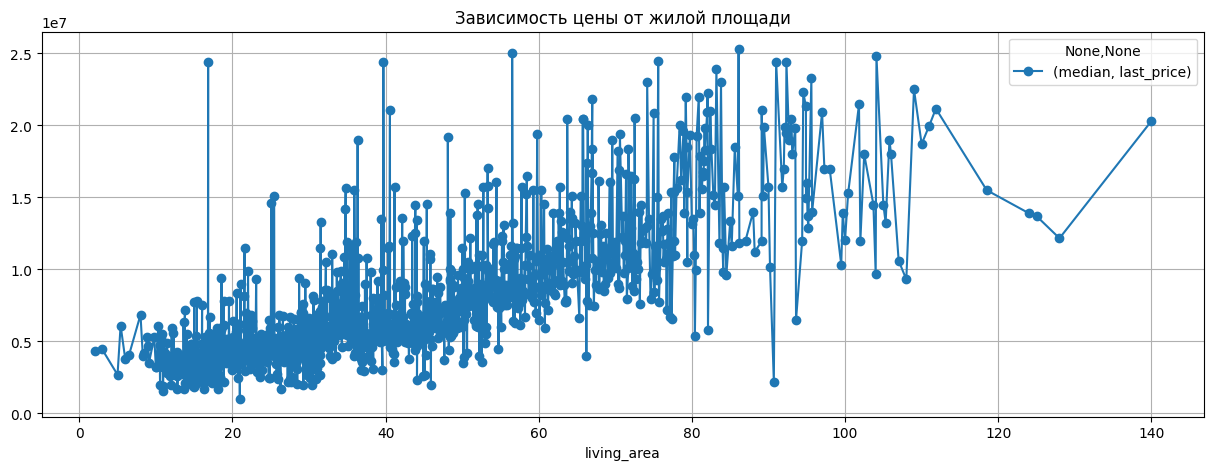

In [63]:
print('Коэффициент корреляции:', data['living_area'].corr(data['last_price']))#рассчитываем коэффициент корреляции для столбца living_area

addiction_price('living_area') #вызываем функцию addiction_price с параметром living_area

#строим график на основе сводной таблицы зависимости цены квартиры от living_area
(data
.pivot_table(index='living_area', values='last_price', aggfunc=['median'])
.plot(grid=True, figsize=(15, 5), style='o-')
)
plt.title('Зависимость цены от жилой площади')
plt.show;

**- зависимость цены от площади кухни**

Коэффициент корреляции: 0.5621788414204365


,Медианное значение стоимости квартиры
kitchen_area,
0.0,2750000.0
1.3,4250000.0
2.0,2720000.0
2.3,2940000.0
2.4,2200000.0
...,...
47.0,17000000.0
48.0,17500000.0
48.3,9500000.0


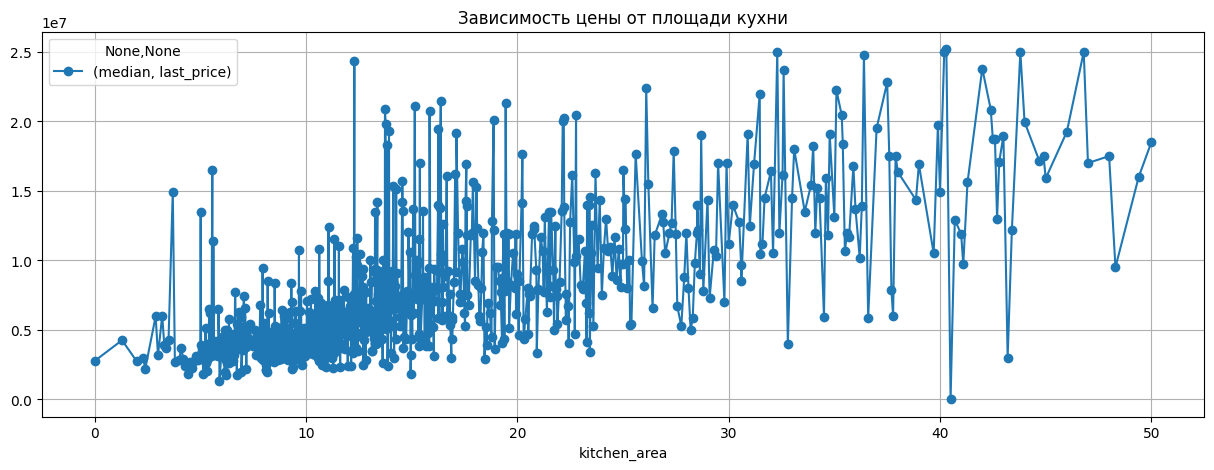

In [64]:
print('Коэффициент корреляции:', data['kitchen_area'].corr(data['last_price']))#рассчитываем коэффициент корреляции для столбца kitchen_area

addiction_price('kitchen_area') #вызываем функцию addiction_price с параметром kitchen_area

#строим график на основе сводной таблицы зависимости цены квартиры от kitchen_area
(data
.pivot_table(index='kitchen_area', values='last_price', aggfunc=['median'])
.plot(grid=True, figsize=(15, 5), style='o-')
)
plt.title('Зависимость цены от площади кухни')
plt.show;

**- зависимость цены от количества комнат**

Коэффициент корреляции: 0.4561953605011012


,Медианное значение стоимости квартиры
rooms,
1,3578694.0
2,4750000.0
3,6000000.0
4,8200000.0


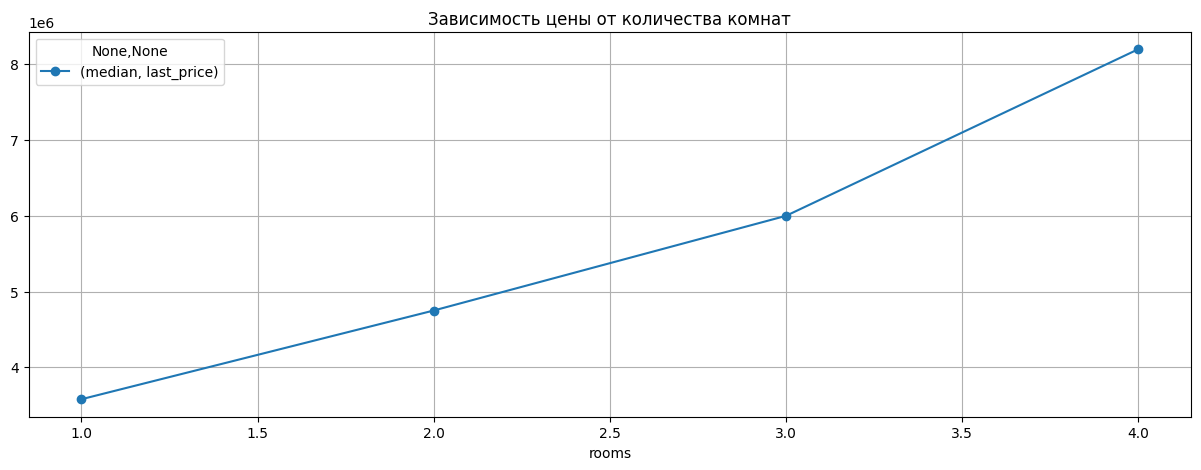

In [65]:
print('Коэффициент корреляции:', data['rooms'].corr(data['last_price']))#рассчитываем коэффициент корреляции для столбца rooms

addiction_price('rooms') #вызываем функцию addiction_price с параметром rooms

#строим график на основе сводной таблицы зависимости цены квартиры от rooms
(data
.pivot_table(index='rooms', values='last_price', aggfunc=['median'])
.plot(grid=True, figsize=(15, 5), style='o-')
)
plt.title('Зависимость цены от количества комнат')
plt.show;

**Вывод по зависимости цены от общей площади, жилой площади, площади кухни и количества комнат:**

Исследование показало, что с увеличением общей площади, жилой площади и площади кухни средняя стоимость квартиры растет, но при этом темп прироста стоимости квартир в зависимости от роста площади кухни ниже, чем от роста общей и жилой площади. Об этом говорит и коэффициент корреляции. С увеличением количества комнат средняя стоимость квартир тоже растет (коэффициент корреляции 0,46).

**- зависимость цены от типа этажа**

,Медианное значение стоимости квартиры
floor_type,
другой,4700000.0
первый,3800000.0
последний,4155000.0


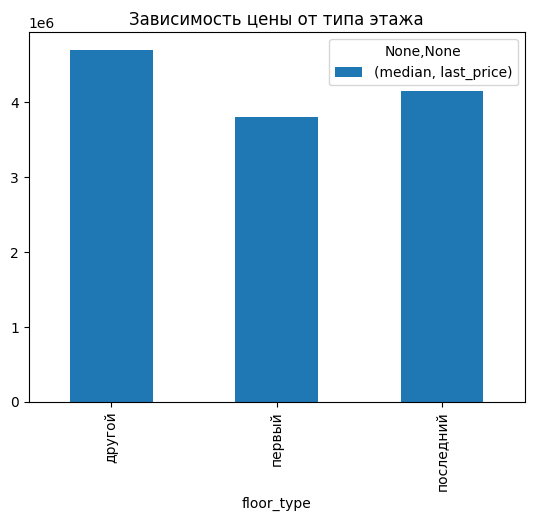

In [66]:
addiction_price('floor_type') #вызываем функцию addiction_price с параметром floor_type

#строим график на основе сводной таблицы зависимости цены квартиры от floor_type
(data
.pivot_table(index='floor_type', values='last_price', aggfunc=['median'])
.plot(kind='bar')
)
plt.title('Зависимость цены от типа этажа')
plt.show;

Цены на квартиры, которые находятся на средних этажах, значительно выше цен на квартиры на первых и последних этажах. Это связано с низким спросом на квартиры на последних и, особенно, первых этажах.

**- зависимость цены от дня размещения объявления**

,Медианное значение стоимости квартиры
weekday_exposition,
0,4500000.0
1,4600000.0
2,4550000.0
3,4500000.0
4,4500000.0
5,4499000.0
6,4500000.0


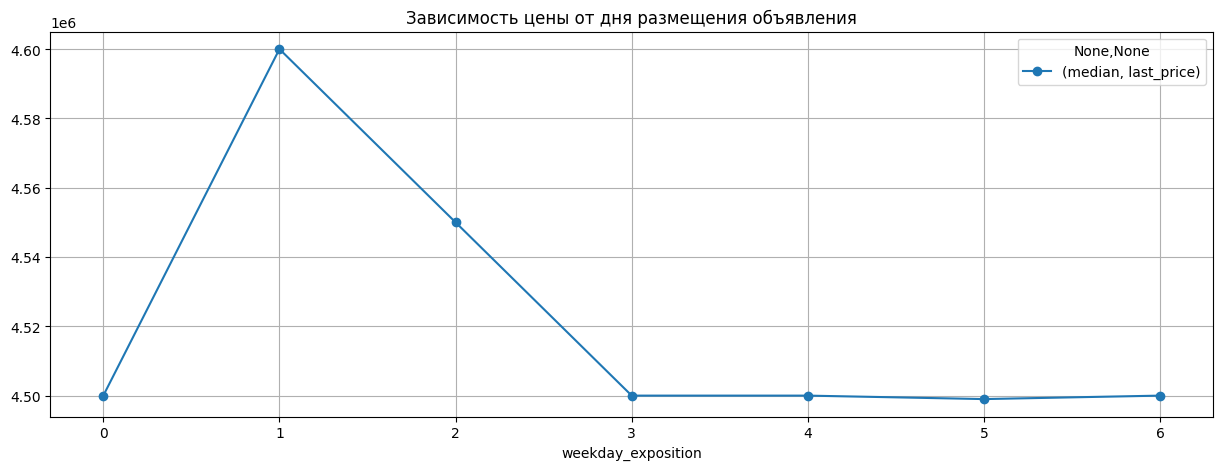

In [67]:
addiction_price('weekday_exposition') #вызываем функцию addiction_price с параметром weekday_exposition

#строим график на основе сводной таблицы зависимости цены квартиры от weekday_exposition
(data
.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['median'])
.plot(grid=True, figsize=(15, 5), style='o-')
)
plt.title('Зависимость цены от дня размещения объявления')
plt.show;

Исследование показало, что по объявлениям, размещенным по вторникам, средняя стоимость квартир чуть выше, чем в другие дни. Но в целом, можно сказать, что сильной зависимости между этими параметрами нет.

**- зависимость цены от месяца размещения объявления**

,Медианное значение стоимости квартиры
month_exposition,
1,4500000.0
2,4500000.0
3,4500000.0
4,4700000.0
5,4450000.0
6,4300000.0
7,4500000.0
8,4500000.0
9,4580000.0


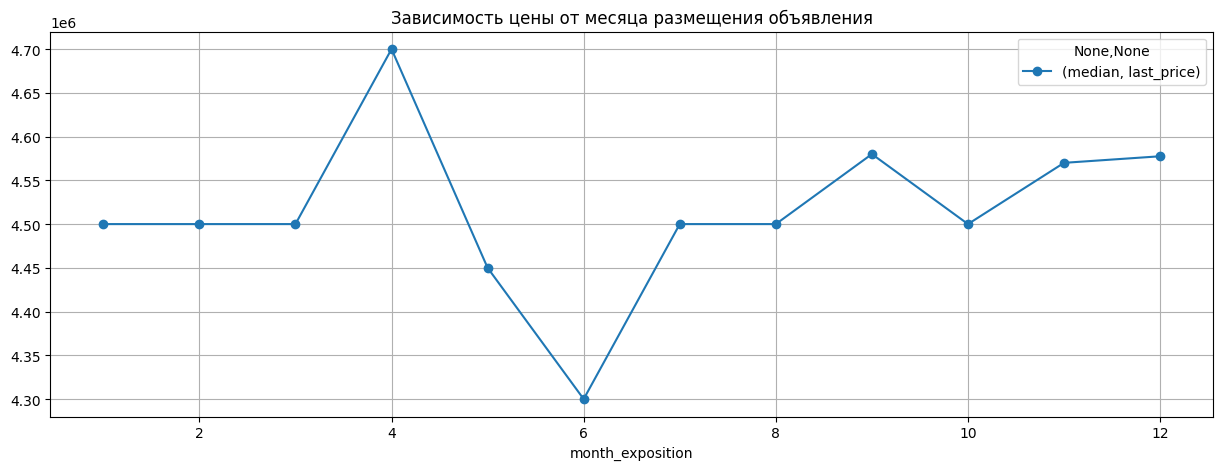

In [68]:
addiction_price('month_exposition') #вызываем функцию addiction_price с параметром month_exposition

#строим график на основе сводной таблицы зависимости цены квартиры от month_exposition
(data
.pivot_table(index='month_exposition', values='last_price', aggfunc=['median'])
.plot(grid=True, figsize=(15, 5), style='o-')
)
plt.title('Зависимость цены от месяца размещения объявления')
plt.show;

Анализ зависимости цены квартиры от месяца размещения показал, что в апреле квартиры чуть выше по цене, нежели в остальные месяцы, а в июне - чуть ниже по цене по сравнению с остальными месяцами. Вероятно, это связано с тем, что весной активность покупателей выше, а летом понижается.

**- зависимость цены от года размещения объявления**

,Медианное значение стоимости квартиры
year_exposition,
2014,6750000.0
2015,5055000.0
2016,4400000.0
2017,4390000.0
2018,4500000.0
2019,4950000.0


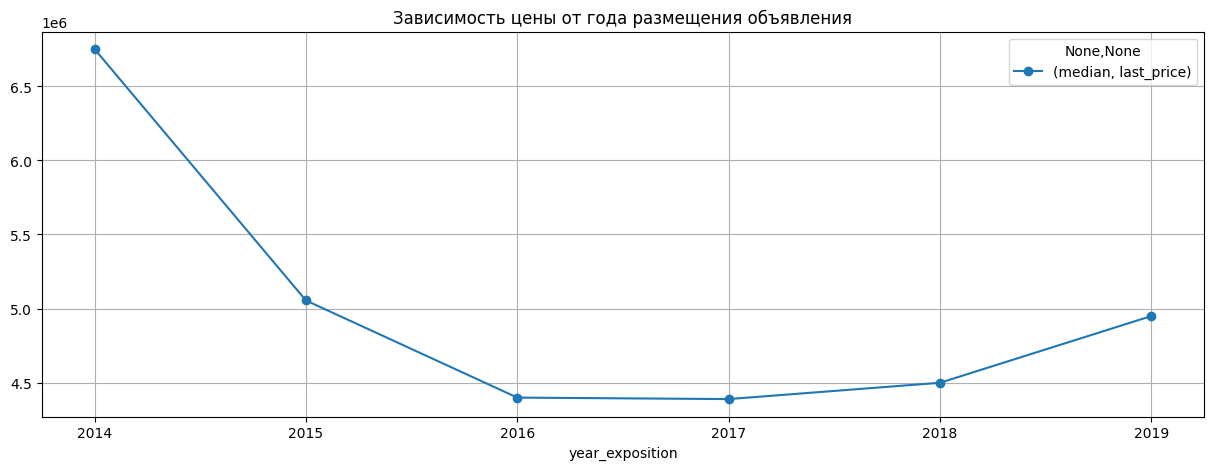

In [69]:
addiction_price('year_exposition') #вызываем функцию addiction_price с параметром year_exposition

#строим график на основе сводной таблицы зависимости цены квартиры от year_exposition
(data
.pivot_table(index='year_exposition', values='last_price', aggfunc=['median'])
.plot(grid=True, figsize=(15, 5), style='o-')
)
plt.title('Зависимость цены от года размещения объявления')
plt.show;

В 2014 году стоимость квартир была самой высокой по отношению к остальным годам выборки, затем - в 2015-2018 годах стоимость квартир снизилась и оставалась примерно одинаковой, а в 2019 году средняя стоимость квартир снова стала расти, что, вероятно, связано с вводом счетов эскроу для защиты дольщиков.

**Выводы по пункту 4.3.:**

 Исследование показало, что с увеличением общей площади, жилой площади и площади кухни средняя стоимость квартиры растет, но при этом темп прироста стоимости квартир в зависимости от роста площади кухни ниже, чем от роста общей и жилой площади. Об этом говорит и коэффициент корреляции.
  С увеличением количества комнат средняя стоимость квартир тоже растет (коэффициент корреляции 0,46).
 
 Цены на квартиры, которые находятся на средних этажах, значительно выше цен на квартиры на первых и последних этажах. Это связано с низким спросом на квартиры на последних и, особенно, первых этажах.
 
 Исследование показало, что по объявлениям, размещенным по вторникам, средняя стоимость квартир чуть выше, чем в другие дни. Но в целом, можно сказать, что сильной зависимости между этими параметрами нет.
 
 Анализ зависимости цены квартиры от месяца размещения показал, что в апреле квартиры чуть выше по цене, нежели в остальные месяцы, а в июне - чуть ниже по цене по сравнению с остальными месяцами. Вероятно, это связано с тем, что весной активность покупателей выше, а летом понижается.
 
 В 2014 году стоимость квартир была самой высокой по отношению к остальным годам выборки, затем - в 2015-2018 годах стоимость квартир снизилась и оставалась примерно одинаковой, а в 2019 году средняя стоимость квартир снова стала расти, что, вероятно, связано с вводом счетов эскроу для защиты дольщиков.

### Расчет средней цены одного квадратного метра в 10 населенных пунктах

,count_ad,one_squere_meter_mean
locality_name,,
Санкт-Петербург,14693,104029.062087
Мурино,588,86250.377687
Кудрово,472,95675.473579
Шушары,437,76923.076923
Всеволожск,395,65789.473684
Пушкин,351,99744.245524
Колпино,335,74725.274725
Парголово,326,91780.224134
Гатчина,305,67924.528302


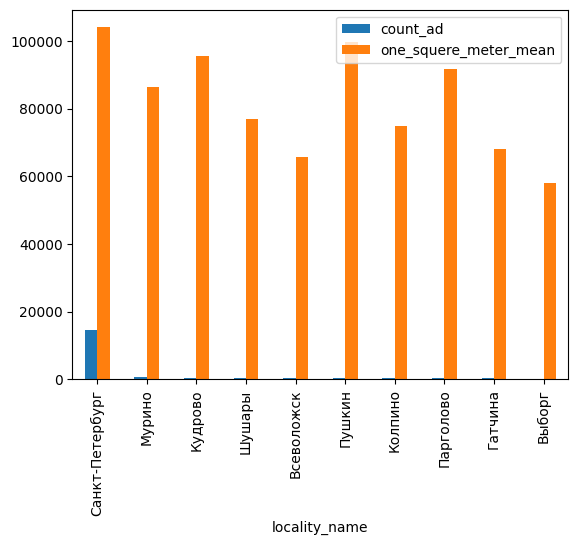

In [70]:
#строим сводную таблицу с расчетом средней цены одного квадратного метра недвижимости
name_one_squere_meter = data.pivot_table(index=['locality_name'] , values='price_one_squere_meter', aggfunc=['count', 'median'])
name_one_squere_meter.columns = ['count_ad', 'one_squere_meter_mean'] #указываем названия столбцов
name_one_squere_meter = name_one_squere_meter.sort_values(by='count_ad', ascending=False)[:10] #сортируем сводную таблицу по убыванию средней цены одного квадратного метра и оставляем первые 10 строк
display(name_one_squere_meter) #выводим отсортированную таблицу на экран

name_one_squere_meter.plot(kind='bar');#строим столбчатую диаграмму для name_one_squere_meter

**Выводы по пункту 4.4:**

  Исследование показало, что в выборке из 10 населенных пунктов самая высокая стоимость квадратного метра в городе Санкт-Петербург (104 029,10 руб.), а самая низкая стоимость квадратного метра в городе Выборг (58 001,42 руб.)

### Изучение зависимости стоимости объектов от расстояния до центра города

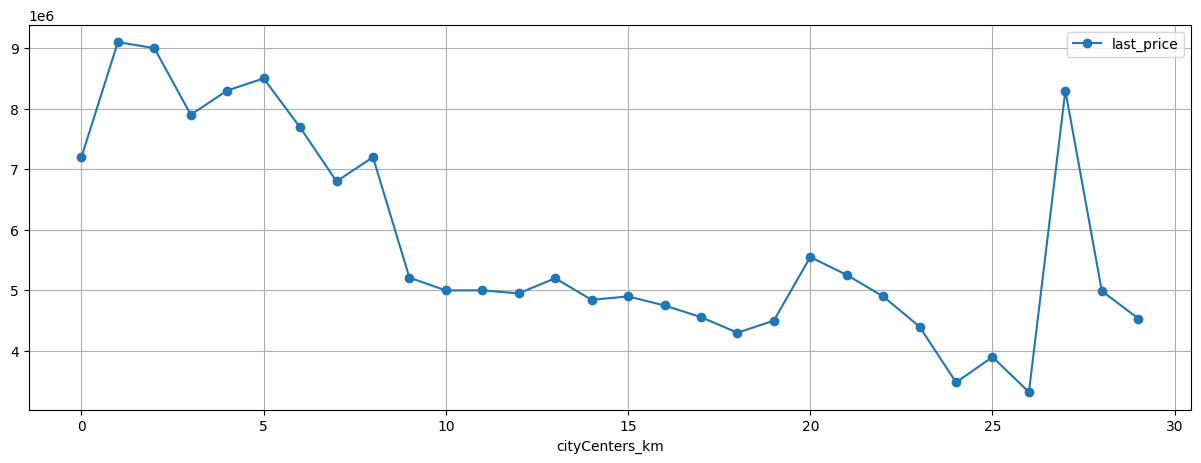

In [71]:
(
    data.query('locality_name == "Санкт-Петербург"')#формируем срез данных по городу Санкт-Петербург
    .pivot_table(index='cityCenters_km', values='last_price', aggfunc='median')#строим сводную таблицу по изменению цены в зависимости от удаленности от центра города
    .plot(grid=True, figsize=(15, 5), style='o-')#строим график, отображающий изменение цены в зависимости от удаленности от центра города
);

**Выводы по пункту 4.5.:**

   Изучение зависимости стоимости объектов от расстояния до центра города показало, что в центре города Санкт-Петербург самая высокая стоимость квартир. Чем далее от центра, тем больше снижается средняя стоимость недвижимости. Судя по графику, центр города заканчивается приблизительно на 8 км от центра.

## Вывод по проекту

В процессе предобработки данных в датафрейме были устранены пропущенные значения в 6 столбцах. В столбце locality_name были удалены 49 строк с пропущенными наименованиями населенных пунктов, так как отсутствие наименований не позволит качественно провести исследовательский анализ в части определения средней цены одного квадратного метра по населенным пунктам, а также анализ квартир в Санкт-Петербурге. В столбце days_exposition пропуски были оставлены незаполненными, так как вероятнее всего, пропуски связаны с тем, что объявление еще не закрыто, т.е. квартира не снята с продажи и количество дней размещения объявления не известно на момент выгрузки данных. Также были оставлены незаполненными 6 столбцов с картографическими данными, так как не обнаружено логичной замены пропусков. 

Также в процессе предобработки данных были изменены типы данных в 4-х столбцах для наглядности и облегчения работы с данными. Были устранены аномальные значения в столбцах rooms, kitchen_area, ceiling_height. 
В результате анализа редких и выбивающихся значений было удалено 1170 строк с выбросами.

Анализ показал, что в среднем продажа квартиры занимает 93 дней. Бывают и быстрые продажи, к примеру, всего 1 день было размещено объявление. Бывают и необычайно долгие продажие - 1580 дней, к примеру.

Исследование показало, что стоимость квартиры больше всего зависит от таких параметров, как общая площадь, жилая площадь,площадь кухни, количество комнат, а также этаж, на котором находится квартира. От других параметров стоимость квартиры зависит гораздо меньше. 
Следует отметить, что в рассматриваемом периоде самая высокая стоимость квартир была в 2014 году, в последующие годы снижалась и оставалась примерно на одинаковом уровне, а затем в 2019 году стоимость квартир начала снова расти, что, вероятно, связано с введением счетов эскроу для защиты дольщиков.

Среди 10 населенных пунктов наиболее высокая стоимость одного квадратного метра жилья в Санкт-Петербурге (примерно 104000 руб. за 1 кв.м.) и наименьшая - в городе Выборг (примерно 58000 руб. за 1 кв.м).

Изучение зависимости стоимости объектов от расстояния до центра города Санкт-Петербург показало, что в центре города Санкт-Петербург самая высокая стоимость квартир. Чем далее от центра, тем больше снижается средняя стоимость недвижимости. Судя по графику, центр города заканчивается приблизительно на 8 км от центра.

В целом можно сказать, что типичная квартира,  чаще всего выставляемая на продажу  в городе Санкт-Петербург и соседних населенных пунктах в 2014-2019 годах, имеет следующие приблизительные параметры: однокомнатная квартира  с общей площадью 35 кв.м, с жилой площадью 18 кв.м и площадью кухни 8 кв.м., высота потолков 2,65 м, находится на 2 этаже пятиэтажного дома. Стоимость такой квартиры примерно 4 000 000 руб., находится в 12 км от центра города, в 17 км от аэропорта, в 400 м от парка.